In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
p1 = pd.read_csv("usa_elect/contb_01.csv")
p2 = pd.read_csv("usa_elect/contb_02.csv")
p3 = pd.read_csv("usa_elect/contb_03.csv")

In [3]:
contbr = pd.concat((p1,p2,p3))

In [4]:
contbr['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [5]:
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }


In [6]:
parties

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Reform',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Libertarian',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [7]:
contbr["parties"] = contbr.cand_nm.map(parties)

In [8]:
contbr.notnull().all()

cand_nm               True
contbr_nm             True
contbr_st            False
contbr_employer      False
contbr_occupation    False
contb_receipt_amt     True
contb_receipt_dt      True
parties               True
dtype: bool

In [9]:
contbr.iloc[1]

cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_st                            AL
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                  50.0
contb_receipt_dt              23-JUN-11
parties                      Republican
Name: 1, dtype: object

In [10]:
contbr.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11,Republican


In [11]:
contbr['parties'].unique()

array(['Republican', 'Democrat', 'Reform', 'Libertarian'], dtype=object)

In [12]:
contbr['parties'].value_counts()

parties
Democrat       593747
Republican     400832
Reform           5920
Libertarian      1234
Name: count, dtype: int64

<Axes: xlabel='parties'>

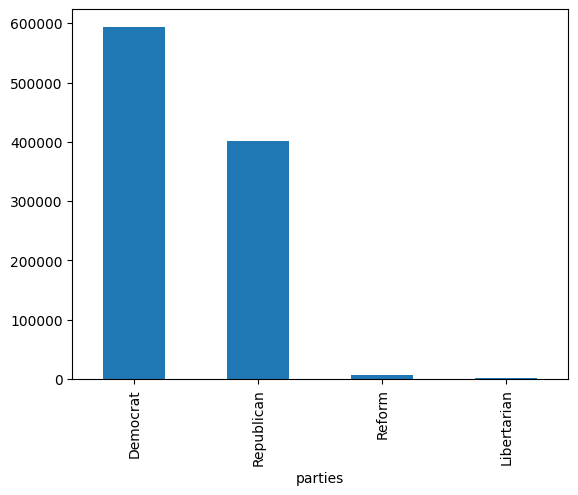

In [13]:
contbr['parties'].value_counts().plot(kind='bar')

In [14]:
group_c = contbr.groupby("parties")

In [16]:
group_c.contb_receipt_amt.sum()

parties
Democrat       1.335028e+08
Libertarian    5.669616e+05
Reform         3.674575e+05
Republican     1.643154e+08
Name: contb_receipt_amt, dtype: float64

<Axes: xlabel='parties'>

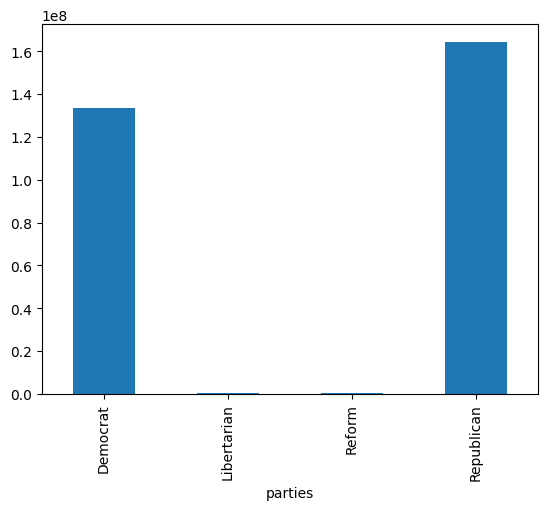

In [17]:
group_c.contb_receipt_amt.sum().plot(kind='bar')

<Axes: xlabel='parties'>

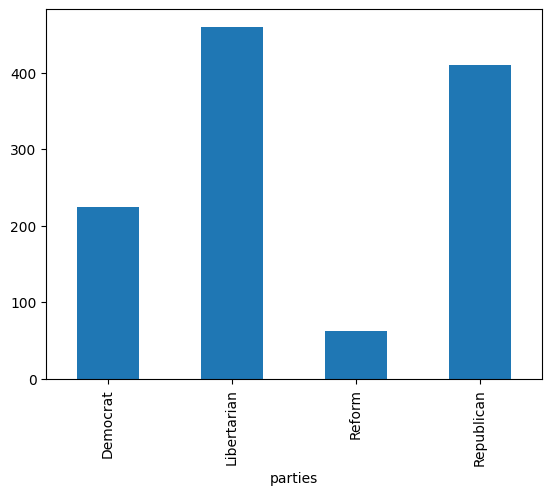

In [19]:
# 查看各个党派人均的捐赠额
group_c.contb_receipt_amt.mean().plot(kind='bar')

In [ ]:
p2.info()

In [ ]:
p3.info()

cand_nm            候选人姓名

contbr_nm          选举人姓名

contbr_st          选举人所属的州

contbr_employer    选举人的职位

contbr_occupation  选举人的行业

contb_receipt_amt  政治献金数目

contb_receipt_dt   捐赠时间

In [22]:
contbr.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt',
       'parties'],
      dtype='object')

In [59]:
temp = contbr.groupby(["contb_receipt_dt","parties"])["contb_receipt_amt"].sum().unstack(level=-1)

In [60]:
temp.sort_index()

parties,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-1-01,NaN,NaN,NaN,8600.00
2011-1-03,NaN,NaN,NaN,4800.00
2011-1-04,NaN,NaN,NaN,5000.00
2011-1-12,NaN,NaN,NaN,4150.00
2011-1-13,NaN,NaN,NaN,4000.00
...,...,...,...,...
2012-4-26,537115.38,1805.0,25.0,505311.33
2012-4-27,745269.95,350.0,560.0,593983.56
2012-4-28,479677.34,NaN,110.0,80759.16


In [27]:
contbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001733 entries, 0 to 1730
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cand_nm            1001733 non-null  object 
 1   contbr_nm          1001733 non-null  object 
 2   contbr_st          1001729 non-null  object 
 3   contbr_employer    988004 non-null   object 
 4   contbr_occupation  993303 non-null   object 
 5   contb_receipt_amt  1001733 non-null  float64
 6   contb_receipt_dt   1001733 non-null  object 
 7   parties            1001733 non-null  object 
dtypes: float64(1), object(7)
memory usage: 68.8+ MB


In [42]:
import datetime

In [33]:
now  =datetime.now()

In [36]:
now

datetime.datetime(2024, 7, 29, 20, 17, 8, 128575)

In [37]:
contbr["contb_receipt_dt"]

0       20-JUN-11
1       23-JUN-11
2       05-JUL-11
3       01-AUG-11
4       20-JUN-11
          ...    
1726    29-SEP-11
1727    30-SEP-11
1728    29-SEP-11
1729    30-SEP-11
1730    31-AUG-11
Name: contb_receipt_dt, Length: 1001733, dtype: object

In [51]:
# 时间类型属于数值型，可以被运算，可以做减法，可以排序
pd.to_datetime(np.array(["2024-09-01"]))

DatetimeIndex(['2024-09-01'], dtype='datetime64[ns]', freq=None)

In [55]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}


In [56]:
def map_datetime(x):
    day,month, year = x.split("-")
    return "20{}-{}-{}".format(year,months[month],day)

In [57]:
map_datetime("29-SEP-11")

'2011-9-29'

In [58]:
contbr["contb_receipt_dt"] = contbr["contb_receipt_dt"].map(map_datetime)

In [61]:
contbr.dtypes

cand_nm               object
contbr_nm             object
contbr_st             object
contbr_employer       object
contbr_occupation     object
contb_receipt_amt    float64
contb_receipt_dt      object
parties               object
dtype: object

In [62]:
# 把符合时间类型的字符串直接转换成时间类型
contbr["contb_receipt_dt"] = pd.to_datetime(contbr["contb_receipt_dt"])

In [63]:
contbr.dtypes

cand_nm                      object
contbr_nm                    object
contbr_st                    object
contbr_employer              object
contbr_occupation            object
contb_receipt_amt           float64
contb_receipt_dt     datetime64[ns]
parties                      object
dtype: object

In [64]:
temp = contbr.groupby(["contb_receipt_dt","parties"])["contb_receipt_amt"].sum().unstack(level=-1)

In [67]:
party_dt  = temp.fillna(0)

In [68]:
party_dt.sort_index(inplace=True)

<Axes: xlabel='contb_receipt_dt'>

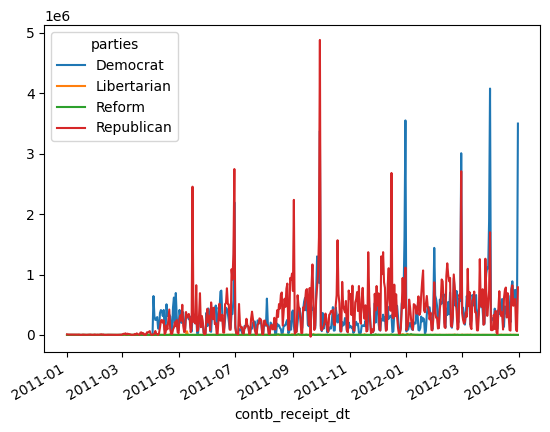

In [71]:
# 线形图默认是看每天的政治献金的数目
party_dt.plot(kind='line')

<Axes: xlabel='contb_receipt_dt'>

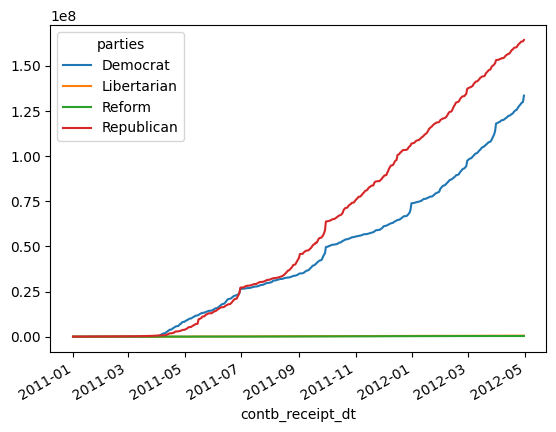

In [73]:
# 看每天的政治献金的累计数，这样可以看到趋势
party_dt.cumsum().plot(kind='line')

In [ ]:
# 我们想知道哪几个月是竞选高峰期
# 需要对月份分组，就要首先把月份找出来，可以使用map的方式
# 类似的逻辑：比如想从用户的手机号中提取一些信息（运营商，地理位置）


In [ ]:
# 但是时间类型上不需要这样解决，时间有时间类型单独的分组处理方案
# 重采样（专门用来做时间分组），前提条件是必须以时间类型作为行索引

In [76]:
temp = contbr.set_index("contb_receipt_dt")

In [78]:
# 按照年分组
temp.resample("Y")["contb_receipt_amt"].sum()

/tmp/ipykernel_339925/569373016.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  temp.resample("Y")["contb_receipt_amt"].sum()


contb_receipt_dt
2011-12-31    1.815070e+08
2012-12-31    1.172456e+08
Freq: YE-DEC, Name: contb_receipt_amt, dtype: float64

/tmp/ipykernel_339925/1396481339.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temp.resample("M")["contb_receipt_amt"].sum().plot(kind='bar')


<Axes: xlabel='contb_receipt_dt'>

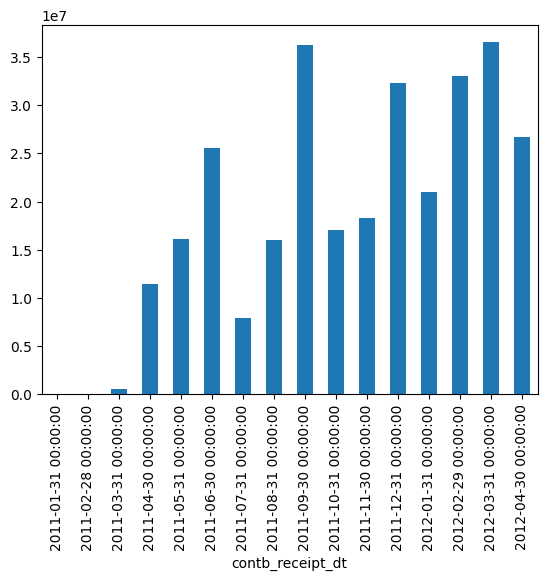

In [82]:
#Y表示年，M表示月，D表示日
temp.resample("M")["contb_receipt_amt"].sum().plot(kind='bar')

In [74]:
contbr.sort_values("contb_receipt_dt",inplace=True)

In [75]:
contbr

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
422062,"Cain, Herman","TRIBBLE, JAMES",TX,NONE,RETIRED,1000.0,2011-01-01,Republican
422061,"Cain, Herman","STOLTENBERG, WAYNE",TX,CINCO RESOURCES,CFO,5200.0,2011-01-01,Republican
423361,"Cain, Herman","MAREK, JOHN",WI,INFORMATION REQUESTED,INFORMATION REQUESTED,2400.0,2011-01-01,Republican
422063,"Cain, Herman","DAVIS, JEREMY S MR.",TX,INTL PETROLEUM ASSOC OF AMERICA,INVESTOR,2400.0,2011-01-03,Republican
423362,"Cain, Herman","SIDNEY, SCOTT",WI,SELF EMPLOYED,CONTRACTOR,2400.0,2011-01-03,Republican
...,...,...,...,...,...,...,...,...
235916,"Obama, Barack","BARRON, BROOKS",CO,PRINCETON UNIVERSITY,STUDENT,35.0,2012-04-30,Democrat
251126,"Obama, Barack","DOUGLAS, LEON T.",DC,SELF-EMPLOYED,DEVELOPMENT ECONOMIST,50.0,2012-04-30,Democrat
109723,"Obama, Barack","BUCKLEY, CHARLES JR.",AK,RETIRED,ELECTRICAL POWER PRODUCTION SPECIALIST,75.0,2012-04-30,Democrat
293695,"Obama, Barack","WILLIAMS, RAFE",GA,"DRAGA LABORATORIES, LLC",MANAGER,100.0,2012-04-30,Democrat


/tmp/ipykernel_339925/3597539065.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  contbr.groupby(["contb_receipt_dt","parties"])["contb_receipt_amt"].sum().unstack(level=-1,fill_value=0).resample("Y").sum().plot(kind='bar')


<Axes: xlabel='contb_receipt_dt'>

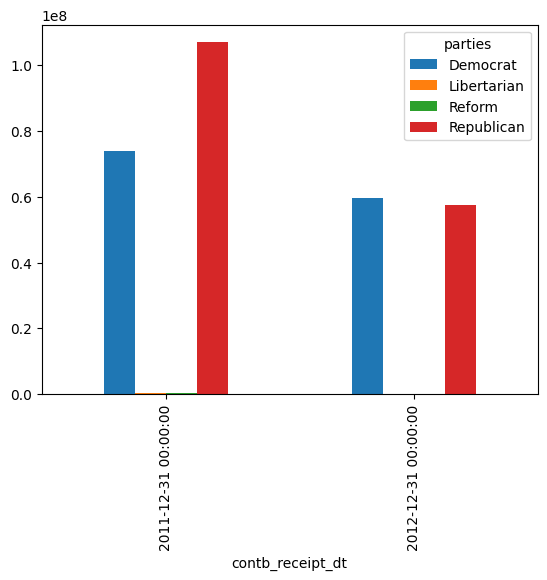

In [89]:
# 查看各个党派，每个月收入的政治献金总数
contbr.groupby(["contb_receipt_dt","parties"])["contb_receipt_amt"].sum().unstack(level=-1,fill_value=0).resample("Y").sum().plot(kind='bar')

In [92]:
# 如果是2分组的逻辑，可以直接使用透视表解决
pd.pivot_table(contbr, index="contb_receipt_dt",columns="parties", values="contb_receipt_amt",aggfunc=sum,fill_value=0).resample("M").sum()

/tmp/ipykernel_339925/1024514804.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(contbr, index="contb_receipt_dt",columns="parties", values="contb_receipt_amt",aggfunc=sum,fill_value=0).resample("M").sum()
/tmp/ipykernel_339925/1024514804.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.pivot_table(contbr, index="contb_receipt_dt",columns="parties", values="contb_receipt_amt",aggfunc=sum,fill_value=0).resample("M").sum()


parties,Democrat,Libertarian,Reform,Republican
contb_receipt_dt,,,,
2011-01-31,0.00,0.00,0.00,60100.00
2011-02-28,0.00,0.00,0.00,40035.00
2011-03-31,0.00,0.00,29890.00,527760.00
2011-04-30,8220580.79,22244.00,14575.00,3161961.81
2011-05-31,6537807.79,76807.41,7085.00,9506840.32
2011-06-30,11642949.35,36700.00,8985.00,13829763.99
2011-07-31,3417404.38,50870.00,31781.99,4361503.15
2011-08-31,4620007.79,53965.00,37084.00,11309359.86
2011-09-30,15166039.38,67645.00,56930.75,20948593.74


In [95]:
contbr.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt',
       'parties'],
      dtype='object')

In [97]:
contbr.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.335028e+08
Romney, Mitt                      8.521925e+07
Paul, Ron                         2.072257e+07
Perry, Rick                       1.841251e+07
Gingrich, Newt                    1.201183e+07
Santorum, Rick                    1.072809e+07
Cain, Herman                      7.047265e+06
Pawlenty, Timothy                 4.255054e+06
Huntsman, Jon                     3.204350e+06
Bachmann, Michelle                2.677435e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.674575e+05
McCotter, Thaddeus G              3.703000e+04
Name: contb_receipt_amt, dtype: float64

<Axes: xlabel='cand_nm'>

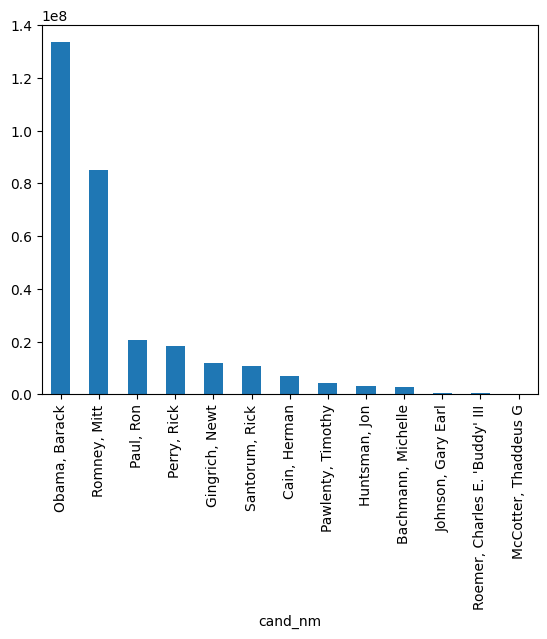

In [98]:
contbr.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False).plot(kind='bar')

In [101]:
# 只关注最有竞争力的两个人
good_man = contbr.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)[:2].index

In [104]:
# 找出最有竞争力的两个人的条件
condition = (contbr["cand_nm"] == good_man[0])|(contbr["cand_nm"]==good_man[1])

In [106]:
good_contb = contbr.loc[condition]

In [107]:
good_contb["cand_nm"].unique()

array(['Obama, Barack', 'Romney, Mitt'], dtype=object)

In [110]:
amt_contb = good_contb.groupby(["cand_nm","contbr_occupation"])["contb_receipt_amt"].sum().unstack(level=-2)

In [112]:
amt_contb["Obama, Barack"].sort_values(ascending=False)

contbr_occupation
RETIRED                    25270707.23
ATTORNEY                   11126932.97
INFORMATION REQUESTED       4849801.96
HOMEMAKER                   4243394.30
PHYSICIAN                   3732387.44
                              ...     
WUNDERMAN                          NaN
YACHT BUILDER                      NaN
YACHT CONSTRUCTION                 NaN
YOUTH CARE WORKER                  NaN
YOUTH OUTREACH DIRECTOR            NaN
Name: Obama, Barack, Length: 33605, dtype: float64

In [113]:
amt_contb["Romney, Mitt"].sort_values(ascending=False)

contbr_occupation
RETIRED                                   11266949.23
INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
HOMEMAKER                                  8037250.86
ATTORNEY                                   5302578.82
PRESIDENT                                  2403439.77
                                             ...     
ZEPPOS AND ASSOCIATES                             NaN
ZONE MANAGER                                      NaN
ZOOKEEPER                                         NaN
ZOOLOGIST                                         NaN
ZOOLOGY EDUCATION                                 NaN
Name: Romney, Mitt, Length: 33605, dtype: float64

In [114]:
contbr.columns

Index(['cand_nm', 'contbr_nm', 'contbr_st', 'contbr_employer',
       'contbr_occupation', 'contb_receipt_amt', 'contb_receipt_dt',
       'parties'],
      dtype='object')

In [115]:
contbr["contbr_occupation"]=="DISABLED VETERAN"

422062    False
422061    False
423361    False
422063    False
423362    False
          ...  
235916    False
251126    False
109723    False
293695    False
161154    False
Name: contbr_occupation, Length: 1001733, dtype: bool

In [123]:
# 也可以使用query语句
contbr.query('contbr_occupation=="DISABLED VETERAN"')

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
402678,"Obama, Barack","DEKLE, CHARLES R.",MD,RETIRED,DISABLED VETERAN,160.0,2011-04-27,Democrat
269432,"Paul, Ron","THORNELL, GARY ENOS MR.",KY,NONE,DISABLED VETERAN,201.2,2011-06-05,Republican
411739,"Cain, Herman","ANDERSON, JOSEPH",GA,NONE,DISABLED VETERAN,100.0,2011-06-18,Republican
402679,"Obama, Barack","DEKLE, CHARLES R.",MD,RETIRED,DISABLED VETERAN,160.0,2011-06-23,Democrat
363743,"Obama, Barack","BAUER, JOSEPH",KY,NOT EMPLOYED,DISABLED VETERAN,85.0,2011-07-08,Democrat
...,...,...,...,...,...,...,...,...
161441,"Obama, Barack","PERITZ, EDWARD B",CA,RETIRED,DISABLED VETERAN,100.0,2012-04-30,Democrat
313913,"Obama, Barack","ALLBEE, DWIGHT",IA,DISABLED,DISABLED VETERAN,25.0,2012-04-30,Democrat
73422,"Obama, Barack","ROBERTS, GORDON",OR,NOT EMPLOYED,DISABLED VETERAN,40.0,2012-04-30,Democrat
466029,"Obama, Barack","RORIE, FOREST",NC,DISABLED,DISABLED VETERAN,20.0,2012-04-30,Democrat


In [117]:
# 过滤出老兵的数据
veteran= contbr.loc[contbr["contbr_occupation"]=="DISABLED VETERAN"]

In [120]:
# 从数量上看老兵支持谁
veteran["cand_nm"].value_counts()

cand_nm
Obama, Barack                     97
Paul, Ron                         46
Santorum, Rick                     6
Cain, Herman                       3
Roemer, Charles E. 'Buddy' III     1
Gingrich, Newt                     1
Name: count, dtype: int64

In [122]:
# 从政治献金额度上看老兵支持谁
veteran.groupby("cand_nm")["contb_receipt_amt"].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     9174.98
Paul, Ron                         4439.10
Santorum, Rick                     550.00
Cain, Herman                       300.00
Gingrich, Newt                     250.00
Roemer, Charles E. 'Buddy' III     100.00
Name: contb_receipt_amt, dtype: float64

In [124]:
veteran

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
402678,"Obama, Barack","DEKLE, CHARLES R.",MD,RETIRED,DISABLED VETERAN,160.0,2011-04-27,Democrat
269432,"Paul, Ron","THORNELL, GARY ENOS MR.",KY,NONE,DISABLED VETERAN,201.2,2011-06-05,Republican
411739,"Cain, Herman","ANDERSON, JOSEPH",GA,NONE,DISABLED VETERAN,100.0,2011-06-18,Republican
402679,"Obama, Barack","DEKLE, CHARLES R.",MD,RETIRED,DISABLED VETERAN,160.0,2011-06-23,Democrat
363743,"Obama, Barack","BAUER, JOSEPH",KY,NOT EMPLOYED,DISABLED VETERAN,85.0,2011-07-08,Democrat
...,...,...,...,...,...,...,...,...
161441,"Obama, Barack","PERITZ, EDWARD B",CA,RETIRED,DISABLED VETERAN,100.0,2012-04-30,Democrat
313913,"Obama, Barack","ALLBEE, DWIGHT",IA,DISABLED,DISABLED VETERAN,25.0,2012-04-30,Democrat
73422,"Obama, Barack","ROBERTS, GORDON",OR,NOT EMPLOYED,DISABLED VETERAN,40.0,2012-04-30,Democrat
466029,"Obama, Barack","RORIE, FOREST",NC,DISABLED,DISABLED VETERAN,20.0,2012-04-30,Democrat
